Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
dataset=pd.read_csv('Breast_cancer.csv')

Display of the Dataset

In [26]:
print(dataset.shape)
dataset.head()

(683, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [28]:
#Describe a data frame in Python - summary statistics of all the variables
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


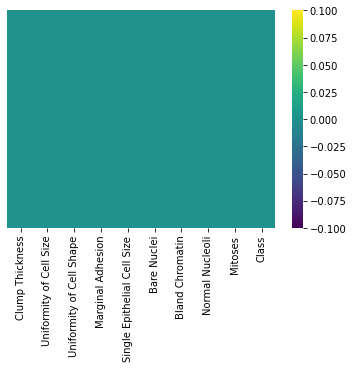

In [29]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
# no null values in the entire dataset

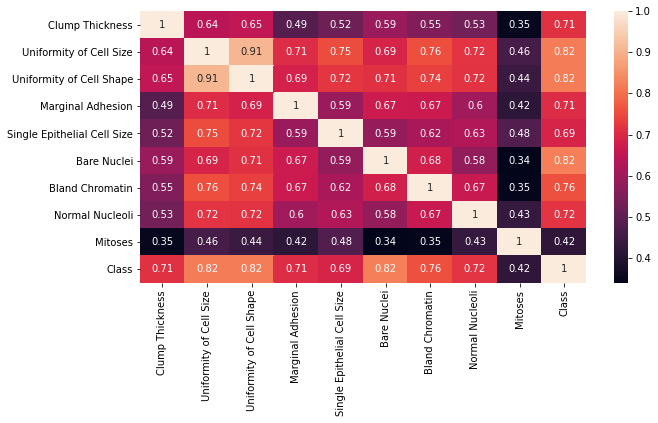

In [30]:
plt.figure(figsize = (10, 5))
sns.heatmap(dataset.corr(), annot = True, annot_kws={"size":10})

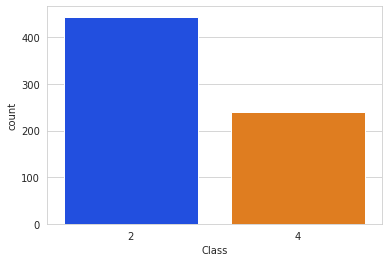

In [31]:
sns.set_style('whitegrid')
sns.countplot(x ='Class', data = dataset, palette ='bright')
# 2 - BENIGN, 4 - MALIGNANT

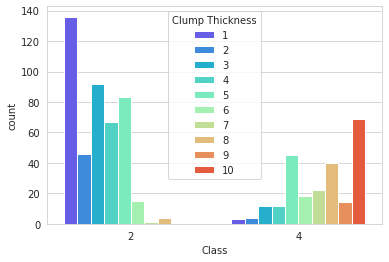

In [32]:
sns.countplot(x = 'Class', hue = 'Clump Thickness', data = dataset, palette = 'rainbow')
# 2(BENIGN) - grouped in mono-layers, 4(MALIGNANT) - grouped in multi-layer.

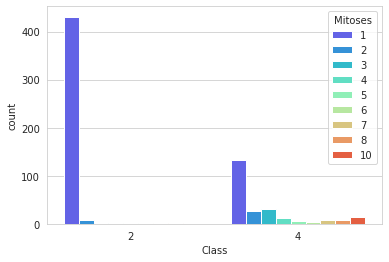

In [33]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', hue = 'Mitoses', data = dataset, palette = 'rainbow')
# 2(BENIGN) - small value(1,2), 4(MALIGNANT) - large value(10,8,...)

In [36]:
# Drop a column
dataset.drop('Sample code number', inplace = True, axis = 1)

print(dataset.shape)
dataset.head()

(683, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


#LOGISTIC REGRESSION

Classification of independent &dependent variable

In [38]:
X = dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

Splitting Data into Training Set and Test Set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Logistic Regression on Training Set

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Test Results

In [42]:
y_pred= classifier.predict(X_test)
print(y_pred)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 4 4 2 4 2 4 4 2 4 4 4 4 2 2 2 4 4 2 2 4 2 2 2 4
 2 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]


Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


Computing the accuracy with k-Fold Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator= classifier, X = X_train, y= y_train, cv = 10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 96.70 %
Standard Deviation : 1.97 %


Input data for Benine or Malignent

In [45]:
a = int(input('Enter Clump Thickness:'))
b = int(input('Enter Uniformity of Cell Size:'))
c = int(input('Enter Uniformity of Cell Shape:'))
d = int(input('Enter Marginal Adhesion:'))
e = int(input('Enter Single Epithelial Cell Size:'))
f = int(input('Enter Bare Nuclei:'))
g = int(input('Enter Bland Chromatin:'))
h = int(input('Enter Normal Nucleoli:'))
i = int(input('Enter Mitoses:'))

Enter Clump Thickness:8
Enter Uniformity of Cell Size:8
Enter Uniformity of Cell Shape:1
Enter Marginal Adhesion:2
Enter Single Epithelial Cell Size:3
Enter Bare Nuclei:4
Enter Bland Chromatin:5
Enter Normal Nucleoli:4
Enter Mitoses:7


Predicting the Result

In [46]:
result = classifier.predict([[a, b, c, d, e, f, g, h, i]])

THE OUTPUT

In [47]:
if result == [4]:
    print('Malignant')
elif result == [2]:
    print('Benign')

Malignant
